In [5]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

from trajOpt.constraints import CircularObstacle,  FullRestInitialWaypoint, FullRestWaypoint, Waypoint
from trajOpt.problemDefinition import  BotParams, ProblemDefinition
import math
print("start")

wpts = (FullRestInitialWaypoint(x=0, y=0, theta=0),
        Waypoint(x=2, y=3, vx=0, theta=math.pi/2),
        FullRestWaypoint(x=2, y=4, theta=math.pi/2),
        Waypoint(x=4, y=0, vx=2, vy=0, theta=0))

botParams = BotParams(wheelRad=0.0381,
                      jerkLim=1,
                      accelLim=3,
                      omegaLim=8,
                      alphaLim=15,
                      maxWheelVel=4.8768,
                      botEdgeSize=1)

obs = [CircularObstacle(x=2,y=1,r=.5)]
problem = ProblemDefinition(botParams, wpts, obs)

print(problem)

problem.build()

problem.solve(tolerance=1e-4)

print(problem.solution)



start
Unsolved Problem Definition: 
        BotParams(wheelRad=0.0381, jerkLim=1, accelLim=3, omegaLim=8, alphaLim=15, maxWheelVel=4.8768, botEdgeSize=1)
        (Waypoint: {'x': 0, 'y': 0, 'theta': 0, 'vx': 0, 'vy': 0, 'ax': 0, 'ay': 0, 'omega': 0, 'alpha': 0}, Waypoint: {'x': 2, 'y': 3, 'vx': 0, 'theta': 1.5707963267948966}, Waypoint: {'x': 2, 'y': 4, 'theta': 1.5707963267948966, 'vx': 0, 'vy': 0, 'ax': 0, 'ay': 0, 'omega': 0, 'alpha': 0}, Waypoint: {'x': 4, 'y': 0, 'vx': 2, 'vy': 0, 'theta': 0})
        [CircularObstacle(x = 2, y = 1, r = 0.5)]
        Samples: [30, 10, 40]
        Unsolved solution with 80 total samples
        
Problem Build Time: 0.0022649765014648438
Problem Solve Time: 0.07985758781433105
Solved Solution:
            Trajectory Total Time: 6.325003330601934
            dt per segment: [0.06954521962651841, 0.12709187269390296, 0.07419320037168359]
            


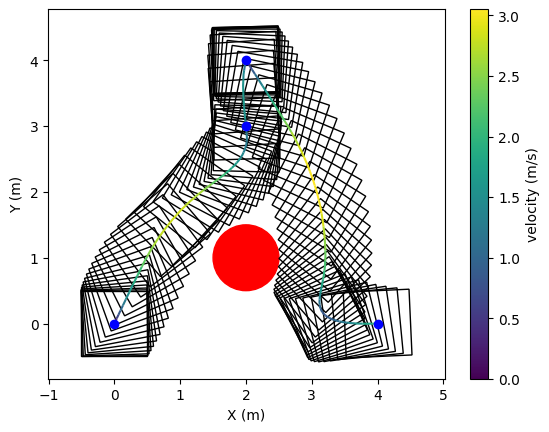

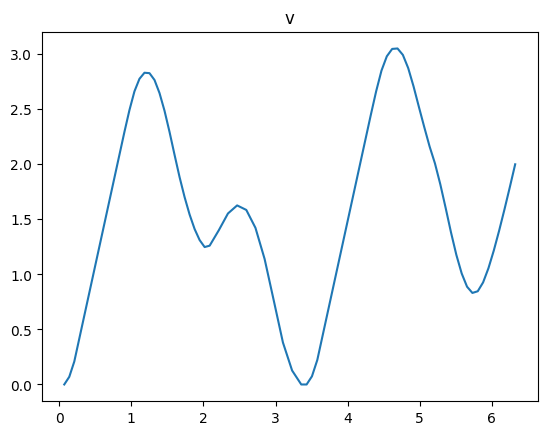

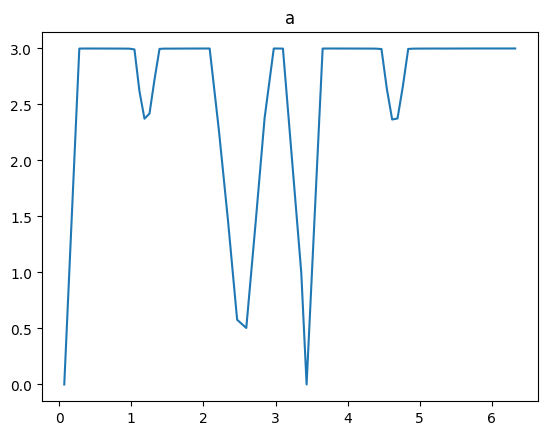

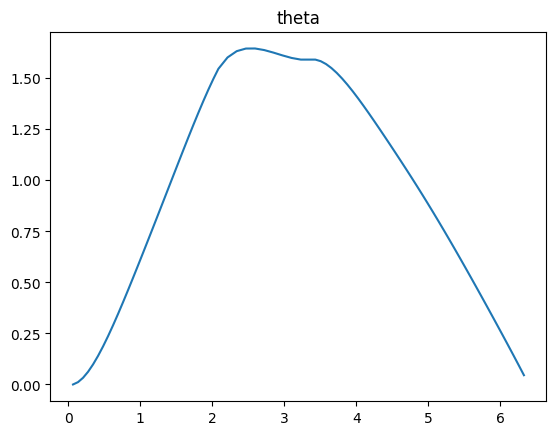

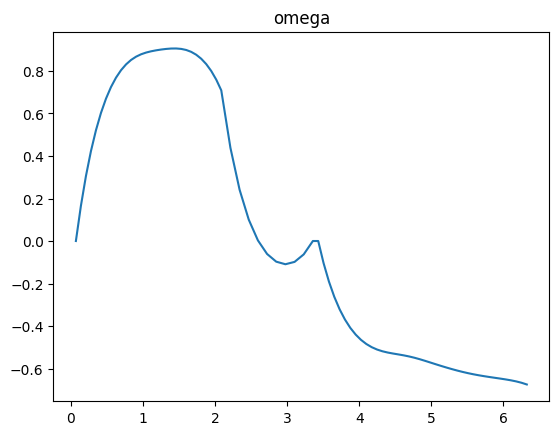

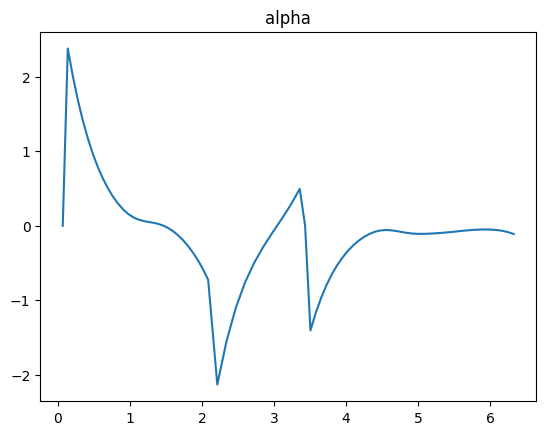

In [7]:
from trajOpt.plotUtil import plot_value_graph, plot_solution

plot_solution(problem)

plot_value_graph(problem, 'v')
plot_value_graph(problem, 'a')
plot_value_graph(problem, 'theta')
plot_value_graph(problem, 'omega')
plot_value_graph(problem, 'alpha')
